In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Recurrence and transience of $d$-dimensional random walks

During week 1, we reviewed the 1D random walk. Here we study how to simulate and visualize the process in higher dimension. 

## The 2-dimensional random walk
The following code simulates a 2-dimensional random walk with different probabilities to go N,S,E,W. You can play with these parameters and check that the Simple Random Walk (SRW) is quite different.

In [10]:
# probabilities for your 
# 2D random walk

[p_N,p_S,p_E,p_W] = [1/4,1/4,1/4,1/4] # = [1/4,1/4,1/4,1/4] for the SRW

# number of steps of the walk
n_steps = 100000

# starting point
start = [0,0]

# run the walk
x = [start[0]]
y = [start[1]]
counter = 1
while counter < n_steps:
    U = np.random.rand()
    if 0 < U <= p_N:
        # going north
        x.append(x[-1] + 1) 
        y.append(y[-1])
    elif p_N < U <= p_N + p_S:
        # going south
        x.append(x[-1] - 1) 
        y.append(y[-1])
    elif p_N + p_S < U <= p_N + p_S+ p_E:
        # going east
        x.append(x[-1])
        y.append(y[-1]+1)
    else:
        # going west
        x.append(x[-1])
        y.append(y[-1]-1)
    counter += 1


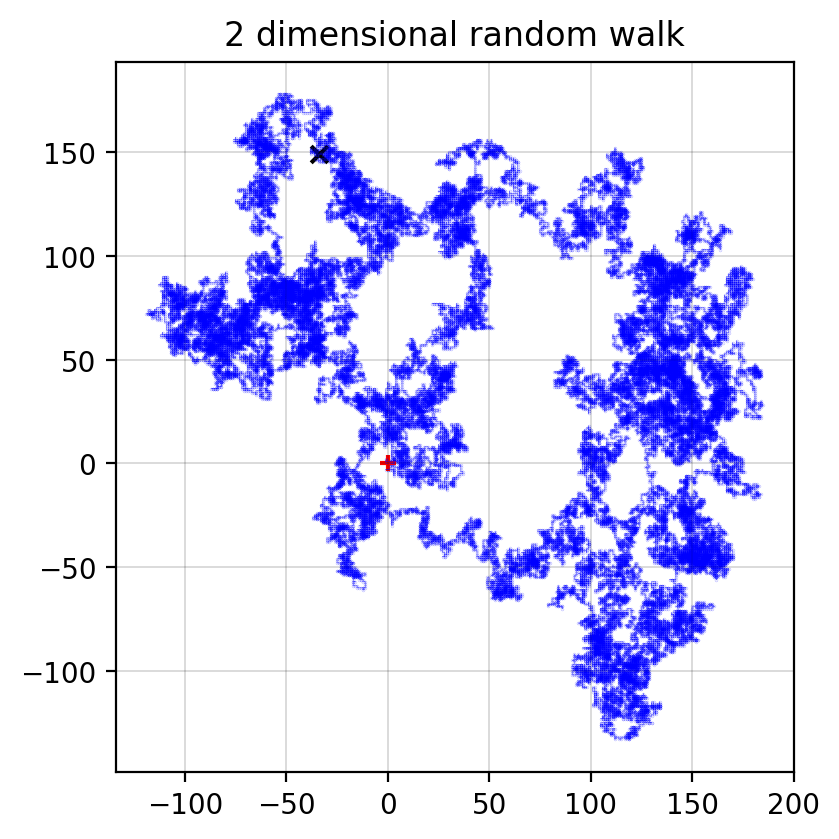

In [11]:
# Plot the 2D-path
fig = plt.figure(figsize=(4,4),dpi=200)
ax = fig.add_subplot(111)
plt.grid(color='black', linestyle='-', linewidth=0.1)
ax.scatter(y, x,c='blue',alpha=0.25,s=0.05);
ax.plot(y, x,c='blue',alpha=0.5,lw=0.25,ls='-');
ax.scatter(y[0], x[0],c='red', marker='+')
ax.scatter(y[-1], x[-1],c='black', marker='x')
plt.title('2 dimensional random walk')
plt.tight_layout(pad=0)

In the homework, we show that the process is recurrent.

## The 3-dimensional random walk

In the lecture, we note that walk is transient in 3D. Let's simulate the walk and see how we can estimate the probability of return.

In [12]:
# number of steps
n_steps = 10**3

# starting point
start = [0,0,0]

# run the walk
x = [start[0]]
y = [start[1]]
z = [start[2]]

counter = 1
while counter < n_steps:
    # choose a random direction  
    vec = np.random.randint(1,4)
    orient = np.random.randint(0,2)*2-1 ## = to -1 or 1 with proba 1/2
    if vec ==1:
        x.append(x[-1]+orient)
        y.append(y[-1])
        z.append(z[-1])
    if vec ==2:
        x.append(x[-1])
        y.append(y[-1]+orient)
        z.append(z[-1])
    else:
        x.append(x[-1])
        y.append(y[-1])
        z.append(z[-1]+orient)
    counter += 1

In [8]:
# Plotting the simulations
fig = plt.figure(figsize=(4,4),dpi=200)
ax = plt.axes(projection='3d')
ax.plot3D(z, y, x, 'blue')
ax.scatter(z[0],y[0], x[0],c='red', marker='+')
ax.scatter(z[-1],y[-1], x[-1],c='black', marker='x')
plt.title('3 dimensional random walk')

ValueError: Unknown projection '3d'

<Figure size 800x800 with 0 Axes>

Hereafter is a function which allows you to compute the number of visits to zero for the three dimensional random walks.

In [13]:
def visits_to_zero_3d(n_simulations,n_steps):
    hist = {1:0} # Initialize the histogram as a dictionnary
    for i in range(n_simulations):
        # number of steps

        # starting point
        start = [0,0,0]

        # run the walk
        x = [start[0]]
        y = [start[1]]
        z = [start[2]]
        zero_count = 1 #you start at one so get +1 for free
        for j in range(n_steps):
            # choose a random direction  
            vec = np.random.randint(1,4)
            orient = np.random.randint(0,2)*2-1 ## = to -1 or 1 with proba 1/2
            if vec ==1: #choose a direction and then an orientation
                x.append(x[-1]+orient)
                y.append(y[-1])
                z.append(z[-1])
            if vec ==2:
                x.append(x[-1])
                y.append(y[-1]+orient)
                z.append(z[-1])
            else:
                x.append(x[-1])
                y.append(y[-1])
                z.append(z[-1]+orient)  
            zero_count += (x[-1]==y[-1]==z[-1]==0)
        if zero_count in hist:
                hist[zero_count] += 1
        else:
                hist[zero_count] = 1
    return hist

{1: 68, 2: 25, 3: 6, 5: 1}


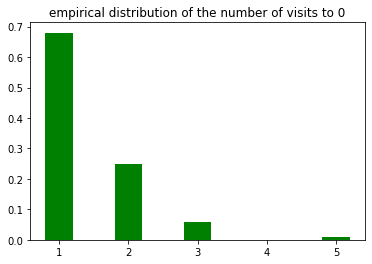

In [14]:
# Plotting the result of the function

n_simulations =10**2
n_steps=10**3

# Get the histogram
# and renormalize the probability distribution
hist = visits_to_zero_3d(n_simulations,n_steps)
print(hist)
total = sum(hist.values())
factor = 1/total

normalized_hist =  {key:value*factor for key,value in hist.items()}

plt.title('empirical distribution of the number of visits to 0')
plt.bar(list(normalized_hist.keys()), normalized_hist.values(), color='g', width=0.4)
plt.show()